In [12]:
library(ggplot2)

In [1]:
# filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200907_data_freeze/differentiation_trajectories/differentiation_efficiency_predictive_model_scores.tsv"
filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200907_data_freeze/differentiation_trajectories/differentiation_efficiency_predictive_model_scores.tsv"

In [2]:
df = read.csv(filename, sep = "\t")
head(df)

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome
HPSI0114i-bezi_1,NA,not_assessed,0.3988890961,success
HPSI0114i-bezi_3,0.58269720,success,0.9695310044,success
HPSI0114i-eipl_1,0.01287835,failure,0.0013544764,failure
HPSI0114i-eipl_3,NA,not_assessed,0.0001822418,failure
HPSI0114i-fikt_3,0.40282686,success,0.9432447363,success
HPSI0114i-iisa_1,NA,not_assessed,0.9707704514,success


In [3]:
length(unique(df$donor_id))

[1] 812

In [4]:
df$short_donor = gsub("_.*","",gsub(".*-","", df$donor_id))
head(df)

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor
HPSI0114i-bezi_1,NA,not_assessed,0.3988890961,success,bezi
HPSI0114i-bezi_3,0.58269720,success,0.9695310044,success,bezi
HPSI0114i-eipl_1,0.01287835,failure,0.0013544764,failure,eipl
HPSI0114i-eipl_3,NA,not_assessed,0.0001822418,failure,eipl
HPSI0114i-fikt_3,0.40282686,success,0.9432447363,success,fikt
HPSI0114i-iisa_1,NA,not_assessed,0.9707704514,success,iisa


In [5]:
df[df$short_donor == 'riun',]

,donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor
731,HPSI1014i-riun_1,NA,not_assessed,1.547987e-05,failure,riun


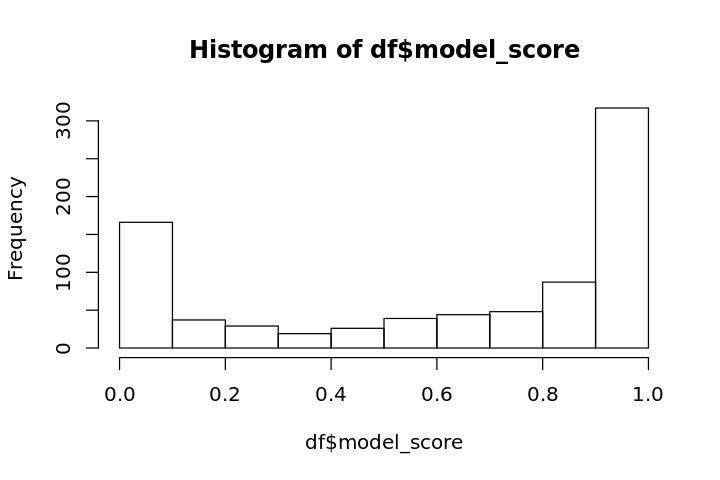

In [6]:
options(repr.plot.width=6, repr.plot.height=4)
hist(df$model_score)

In [7]:
# T = 0.2
T = 0.02231
# nrow(df)
df_fail = df[df$model_predicted_outcome == 'failure',]
df_fail = df[df$model_score < T,]
# nrow(df_fail)
nrow(df_fail)/nrow(df)

[1] 0.135468

In [8]:
length(unique(df$short_donor))

[1] 540

[1] 271

[1] 0.6924177

[1] 0.7711062

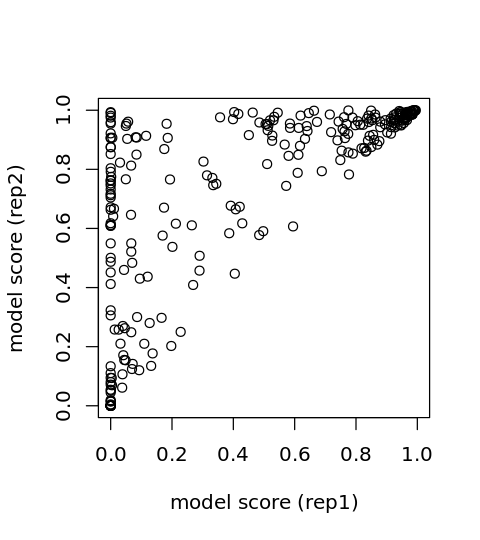

In [9]:
options(repr.plot.width=4, repr.plot.height=4.5)
x <- c()
y <- c()
for (i in 1:length(unique(df$short_donor))){
    donor = unique(df$short_donor)[i]
    if (nrow(df[df$short_donor == donor,]) >1){
        x = c(x,min(df[df$short_donor == donor,"model_score"]))
        y = c(y,max(df[df$short_donor == donor,"model_score"]))
    }
}
length(x)
cor(x,y)
cor(x,y,method = "spearman")
plot(x,y, xlab = "model score (rep1)", ylab = 'model score (rep2)', xlim = c(0,1), ylim= c(0,1))

In [10]:
df_to_plot = data.frame(x = x, y = y)
head(df_to_plot)

x,y
0.3988890961,0.969531004
0.0001822418,0.001354476
0.9562231954,0.970770451
0.9466974422,0.950745581
0.9772104811,0.995142084
0.9713497719,0.990458436


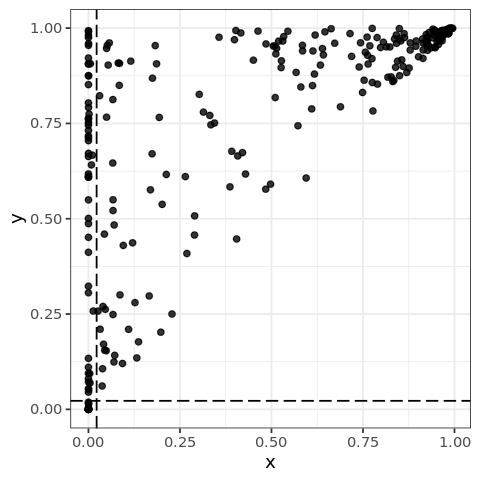

In [16]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df_to_plot, aes(x = x, y = y)) + geom_point(size = 1.5, alpha = 0.8) + 
        geom_hline(yintercept = 0.0223, linetype = "longdash") + 
        geom_vline(xintercept = 0.0223, linetype = "longdash") +
        theme_bw()

In [18]:
concordant_1 = c()
concordant_0 = c()
discordant = c()

In [19]:
for (i in 1:length(unique(df$short_donor))){
    donor = unique(df$short_donor)[i]
    r = df[df$short_donor == donor,]
    if (nrow(r)>2){
        print(donor)
    }
    if (nrow(r)==2){
        rep1 = r[r$short_donor == donor,"donor_id"][1]
        rep2 = r[r$short_donor == donor,"donor_id"][2]
        score1 = r[r$donor_id == rep1,"model_score"]
        score2 = r[r$donor_id == rep2,"model_score"]
        if (score1 > T & score2 > T){
            concordant_1 = c(concordant_1,donor)
        }
        if (score1 <= T & score2 <= T){
            concordant_0 = c(concordant_0,donor)
        }
        if ((score1 > T & score2 <= T) | (score1 <= T & score2 > T)){
            discordant = c(discordant,donor)
        }
    }
}

[1] "sohd"


In [20]:
length(concordant_0)
length(concordant_1)
length(discordant)

[1] 13

[1] 208

[1] 49

In [16]:
# bulk iPSC

In [18]:
#t_file = '/nfs/leia/research/stegle/dseaton/hipsci/proteomics_analysis/data/analysis/IPSc.ISR.featureCounts.genes.counts.unique.stranded.tsv_counts.HQ_TMM_TPM.tsv.gz'
t_file = '/hps/nobackup/hipsci/scratch/trans_eqtls/IPS_Bulk-RNA_Processing/Merged/IPS_Bulk-RNA_Processing/FullFreeze_Corrected_iPSC_20180506.txt.gz'

t_df = read.csv(t_file,sep='\t', row.names = 1)

In [19]:
head(t_df,2)

,X1191d5e0.9a2a.4ba4.b322.a591912160ee,X1b4ab422.05e5.4891.906e.12e9e9c65745,X217cd7ee.bfe8.4d37.b014.e47187901dbe,X6a50e9bf.8d92.4bac.98f0.50eee10d91d4,X896a9050.1423.490a.a12e.3db6217b49d3,a9cadef1.380e.4c4f.a33c.a828a58680e0,c3b0cf52.6a8d.4bba.ad6f.aca07b4ce145,HPSI0114i.bezi_1.hs37d5,HPSI0114i.bezi_3.hs37d5,HPSI0114i.eipl_1.hs37d5,...,SRR5589736,SRR5589737,SRR5589738,SRR5589739,SRR5589740,SRR5589741,SRR5589742,SRR5589743,SRR5589744,SRR5589745
ENSG00000223972,0.5344626,0.148611,0.000000,0.5858367,0.283967,0.1444611,0.3525601,0.2403484,0.1164022,0.1521228,...,0.2332243,0.7274514,0.000000,0.000000,0.00000,0.2645803,0.4455507,0.000000,0.4096429,0.7887012
ENSG00000227232,6.1188713,5.498526,5.530272,5.8288173,5.259845,5.6636704,5.6418591,5.9497365,5.8042281,5.9982958,...,5.7525242,5.7235908,5.965397,5.833703,5.84738,5.6856543,6.0737743,5.078349,5.8858752,5.3667701


In [20]:
new_cols = gsub('\\.','-',gsub('.hs37d5','',colnames(t_df)))

In [21]:
colnames(t_df) = new_cols
head(t_df,2)

,X1191d5e0-9a2a-4ba4-b322-a591912160ee,X1b4ab422-05e5-4891-906e-12e9e9c65745,X217cd7ee-bfe8-4d37-b014-e47187901dbe,X6a50e9bf-8d92-4bac-98f0-50eee10d91d4,X896a9050-1423-490a-a12e-3db6217b49d3,a9cadef1-380e-4c4f-a33c-a828a58680e0,c3b0cf52-6a8d-4bba-ad6f-aca07b4ce145,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,...,SRR5589736,SRR5589737,SRR5589738,SRR5589739,SRR5589740,SRR5589741,SRR5589742,SRR5589743,SRR5589744,SRR5589745
ENSG00000223972,0.5344626,0.148611,0.000000,0.5858367,0.283967,0.1444611,0.3525601,0.2403484,0.1164022,0.1521228,...,0.2332243,0.7274514,0.000000,0.000000,0.00000,0.2645803,0.4455507,0.000000,0.4096429,0.7887012
ENSG00000227232,6.1188713,5.498526,5.530272,5.8288173,5.259845,5.6636704,5.6418591,5.9497365,5.8042281,5.9982958,...,5.7525242,5.7235908,5.965397,5.833703,5.84738,5.6856543,6.0737743,5.078349,5.8858752,5.3667701


In [22]:
t_df = t_df[, grep('HPSI',colnames(t_df))]
head(t_df,2)
nrow(t_df)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI1213i-babk_2,HPSI1213i-foqj_2,HPSI1213i-hehd_1,HPSI1213i-hehd_2,HPSI1213i-nekd_1,HPSI1213i-pahc_4,HPSI1213i-pahc_5,HPSI1213i-tolg_4,HPSI1213i-tolg_6,HPSI1213i-xuja_2
ENSG00000223972,0.2403484,0.1164022,0.1521228,0.5431085,0.00000,0.6143799,0.346214,0.2556513,0.4662304,0.7333012,...,0.3188272,0.09838474,0.2364095,0.2464212,0.1670463,0.5254766,0.4030978,0.5636254,0.5362689,0.1287882
ENSG00000227232,5.9497365,5.8042281,5.9982958,6.1035282,5.31315,5.3678778,5.645318,5.9977255,5.6332916,6.2739845,...,5.7577560,6.03089424,5.5266274,5.6275444,5.8062306,6.2851530,5.7794632,5.3130083,5.6329879,6.2684811


[1] 56057

In [23]:
bulk_df = as.data.frame(t(t_df[c("ENSG00000171794","ENSG00000166863"),]))
colnames(bulk_df) = c('UTF1','TAC3')
bulk_df$donor_id = rownames(bulk_df)
head(bulk_df)

,UTF1,TAC3,donor_id
HPSI0114i-bezi_1,4.702476,5.564156,HPSI0114i-bezi_1
HPSI0114i-bezi_3,2.979417,5.493768,HPSI0114i-bezi_3
HPSI0114i-eipl_1,8.503246,3.347745,HPSI0114i-eipl_1
HPSI0114i-eipl_3,8.949141,4.493165,HPSI0114i-eipl_3
HPSI0114i-fikt_3,4.679852,5.328349,HPSI0114i-fikt_3
HPSI0114i-iisa_1,4.883805,5.763036,HPSI0114i-iisa_1


In [24]:
m_U = min(bulk_df$UTF1)
M_U = max(bulk_df$UTF1)
m_T = min(bulk_df$TAC3)
M_T = max(bulk_df$TAC3)

In [25]:
# library(dplyr)

In [26]:
head(df)
df$donor_diff_results = 'one_line_only'
df$donor_diff_results[df$short_donor %in% concordant_1] = 'concordant_1'
df$donor_diff_results[df$short_donor %in% concordant_0] = 'concordant_0'
df$donor_diff_results[df$short_donor %in% discordant] = 'discordant'
df[df$short_donor == 'sohd',"donor_diff_results"] = 'concordant_1'
head(df)

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor
HPSI0114i-bezi_1,NA,not_assessed,0.795830284,success,bezi
HPSI0114i-bezi_3,0.58269720,success,0.990335903,success,bezi
HPSI0114i-eipl_1,0.01287835,failure,0.008453323,failure,eipl
HPSI0114i-eipl_3,NA,not_assessed,0.009314145,failure,eipl
HPSI0114i-fikt_3,0.40282686,success,0.950780075,success,fikt
HPSI0114i-iisa_1,NA,not_assessed,0.981784364,success,iisa


donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor,donor_diff_results
HPSI0114i-bezi_1,NA,not_assessed,0.795830284,success,bezi,concordant_1
HPSI0114i-bezi_3,0.58269720,success,0.990335903,success,bezi,concordant_1
HPSI0114i-eipl_1,0.01287835,failure,0.008453323,failure,eipl,concordant_0
HPSI0114i-eipl_3,NA,not_assessed,0.009314145,failure,eipl,concordant_0
HPSI0114i-fikt_3,0.40282686,success,0.950780075,success,fikt,one_line_only
HPSI0114i-iisa_1,NA,not_assessed,0.981784364,success,iisa,concordant_1


In [26]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/predicted_diff_efficiency_hipsci_lines_including_concordant_discordant_info.csv",
         row.names = F, quote = F)

In [27]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [28]:
df_00 = df[df$short_donor %in% concordant_0,]
df_00$rep = 'rep1'
df_00[seq(2,nrow(df_00),2),'rep'] = 'rep2'
# head(df_00,2)

df0 = inner_join(df_00, bulk_df, by = "donor_id")
head(df0,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor,donor_diff_results,rep,UTF1,TAC3
HPSI0114i-eipl_1,0.01287835,failure,0.008453323,failure,eipl,concordant_0,rep1,8.503246,3.347745
HPSI0114i-eipl_3,NA,not_assessed,0.009314145,failure,eipl,concordant_0,rep2,8.949141,4.493165


In [29]:
unique(df_00$short_donor)

[1] "eipl" "kozf" "oilg" "romx" "vieg" "sojd" "eoko" "qeti" "vats" "ceik"
[11] "oikd" "aicq" "ruah" "zige" "coio" "leeh" "jepf" "jory" "peoo" "raet"
[21] "suqd" "auim" "oomz" "vorx" "lipl" "lirf" "uevq" "voce" "biln" "rily"
[31] "burb" "oatm" "kije" "uixy" "lise" "hikt" "moyn" "jufd" "bilx" "tuju"
[41] "oaaz" "wiau" "pahc"

In [30]:
df_11 = df[df$short_donor %in% concordant_1,]
df_11$rep = 'rep1'
df_11[seq(2,nrow(df_11),2),'rep'] = 'rep2'
# head(df_00,2)

df1 = inner_join(df_11, bulk_df, by = "donor_id")
head(df1,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor,donor_diff_results,rep,UTF1,TAC3
HPSI0114i-bezi_1,NA,not_assessed,0.7958303,success,bezi,concordant_1,rep1,4.702476,5.564156
HPSI0114i-bezi_3,0.5826972,success,0.9903359,success,bezi,concordant_1,rep2,2.979417,5.493768


In [31]:
df_01 = df[df$short_donor %in% discordant,]
df_01$rep = 'rep1'
for (donor in unique(df_01$short_donor)){
    r = df_01[df_01$short_donor == donor,]
#     print(head(r))
    df_01[df_01$short_donor == donor & df_01$model_score == min(r$model_score),'rep'] = 'rep1'
    df_01[df_01$short_donor == donor & df_01$model_score == max(r$model_score),'rep'] = 'rep2'
}
# head(df_01)
df01 = inner_join(df_01, bulk_df, by = "donor_id")
head(df01,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome,short_donor,donor_diff_results,rep,UTF1,TAC3
HPSI0115i-aion_2,0.7118205,success,9.746932e-01,success,aion,discordant,rep2,6.565273,4.743942
HPSI0115i-aion_3,NA,not_assessed,1.187752e-05,failure,aion,discordant,rep1,9.488479,2.133053


In [32]:
unique(df_01$short_donor)

[1] "aion" "bimq" "iinu" "qaqp" "xaka" "feec" "aiid" "dewh" "vieg" "xanu"
[11] "bubh" "cuhk" "sojd" "xugn" "muwv" "vats" "ougl" "peop" "eevy" "niim"
[21] "oaqd" "iooi" "mapx" "ourj" "ruah" "sevr" "zige" "aipt" "euir" "xegx"
[31] "fiaj" "qajt" "wiii" "xufp" "hapz" "iool" "iuoc" "menz" "oadp" "oazw"
[41] "pews" "raet" "suyj" "vebd" "yist" "zukb" "auim" "giuo" "hikj" "lizq"
[51] "oomz" "qanu" "qony" "riiv" "ciwj" "fovu" "miaj" "paab" "puhk" "voce"
[61] "voxu" "beyk" "biln" "heba" "mesv" "rily" "uegn" "dard" "darw" "qimz"
[71] "ruyv" "keui" "kute" "nufh" "oatm" "tosj" "xiry" "siqu" "kije" "neow"
[81] "lise" "qehq" "vajy" "vorn" "zipi" "jufd" "nibo" "zuta" "aimh" "geve"
[91] "mebq" "wakr" "wiau" "yiek"

In [33]:
library(ggplot2)
library(ggthemes)
library(cowplot)
mypalette = "Primary colors with a vibrant twist"


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map



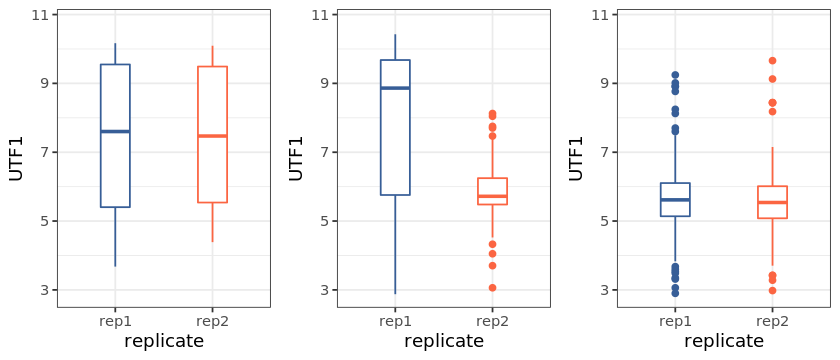

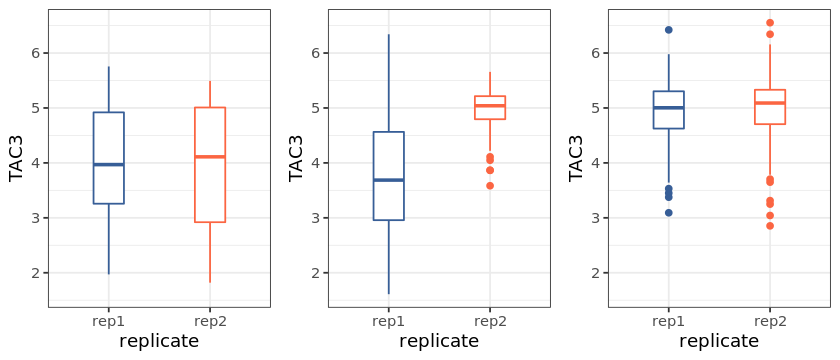

In [34]:
options(repr.plot.width=7, repr.plot.height=3)
p1 = ggplot(df0, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p2 = ggplot(df01, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p3 = ggplot(df1, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
plot_grid(p1,p2,p3, ncol = 3)

p1 = ggplot(df0, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p2 = ggplot(df01, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p3 = ggplot(df1, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
plot_grid(p1,p2,p3, ncol = 3)

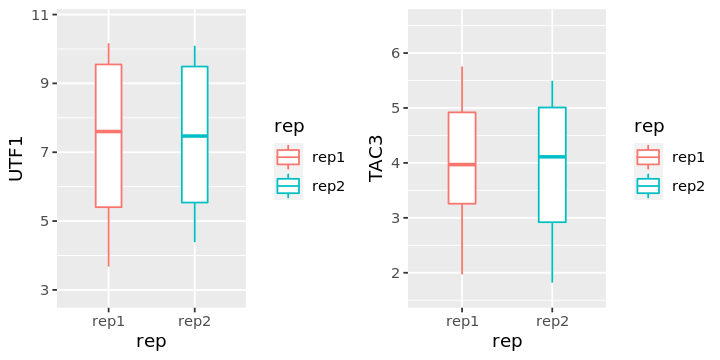

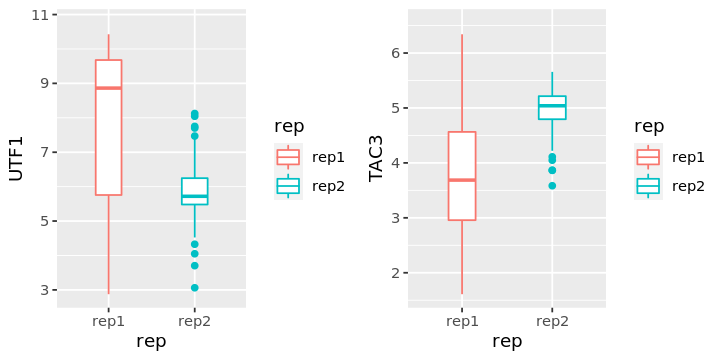

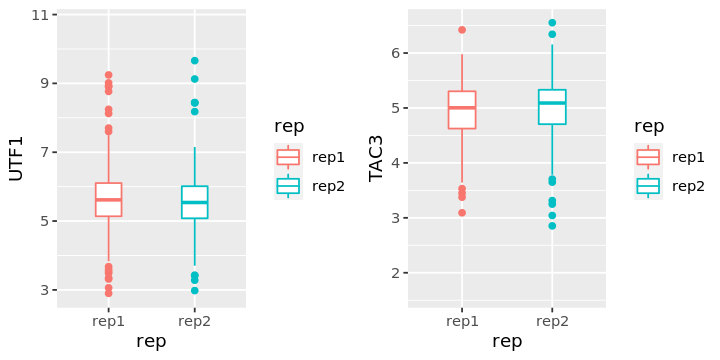

In [35]:
options(repr.plot.width=6, repr.plot.height=3)
p1 = ggplot(df0, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df0, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

p1 = ggplot(df01, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df01, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

p1 = ggplot(df1, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df1, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

In [43]:
# library(dplyr)
library(cowplot)
# library(ggplot2)

In [47]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/predicted_diff_efficiency_hipsci_lines_including_concordant_discordant_info.csv")
head(df)

donor_id,diff_efficiency,model_score,short_donor,donor_diff_results
HPSI0114i-bezi_1,not_assessed,0.959917254,bezi,concordant_1
HPSI0114i-bezi_3,succeeded,0.994178186,bezi,concordant_1
HPSI0114i-eipl_1,failed,0.005722711,eipl,concordant_0
HPSI0114i-eipl_3,not_assessed,0.007677837,eipl,concordant_0
HPSI0114i-fikt_3,succeeded,0.965656771,fikt,one_line_only
HPSI0114i-iisa_1,not_assessed,0.974303824,iisa,concordant_1


In [22]:
p = nrow(df[df$model_score < T,])/nrow(df)
p_1 = 1 - nrow(df[df$model_score < T,])/nrow(df)
c(p,p_1)

[1] 0.1256158 0.8743842

In [39]:
probs = c(p_1**2, p*p_1, p**2)
probs

[1] 0.76454779 0.10983644 0.01577932

In [40]:
chisq.test(x = c(209,49,13), y = probs)

Warning message in chisq.test(x = c(209, 49, 13), y = probs):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  c(209, 49, 13) and probs
X-squared = 6, df = 4, p-value = 0.1991


In [25]:
df0 = df[df$donor_diff_results != "one_line_only",]
nrow(df0)

[1] 0

In [40]:
df1 = df[df$donor_diff_results == "one_line_only",]
nrow(df1)

[1] 269

In [41]:
nrow(df1[df1$model_score < 0.2,])/nrow(df1)

[1] 0.1524164

In [42]:
chisq.test(x = c(183,62,25), y = c(0.72,0.17,0.023))

Warning message in chisq.test(x = c(183, 62, 25), y = c(0.72, 0.17, 0.023)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  c(183, 62, 25) and c(0.72, 0.17, 0.023)
X-squared = 6, df = 4, p-value = 0.1991


In [4]:
?fisher.test

In [6]:
x = matrix(c(14,1,0,1),nrow=2)
x

14,0
1,1


In [9]:
fisher.test(x, alternative="less")


	Fisher's Exact Test for Count Data

data:  x
p-value = 1
alternative hypothesis: true odds ratio is less than 1
95 percent confidence interval:
   0 Inf
sample estimates:
odds ratio 
       Inf 
